In [1]:
%%script false --no-raise-error
<div class="text-box bulleted">
    <h1 class="header">How to get your data</h1>
    <p class="text">Go to your <a href="https://www.spotify.com/in-en/account/privacy/" target="_blank" rel="noopener noreferrer">Spotify Account page</a><sup>(1)</sup>.</p>

    <p class="text">(1) https://www.spotify.com/in-en/account/privacy/</p>
</div>

In [2]:
import pandas as pd

from utils.plots import Plots
from utils.process_zip import SongAttributes

# Prevent wrapping of dataframes when printed
pd.set_option("display.expand_frame_repr", False)

In [3]:
from utils.process_zip import process_zip

zip_path = "./my_spotify_data.zip"
filters: list[SongAttributes] = [
    "ts",
    "ms_played",
    "master_metadata_track_name",
    "master_metadata_album_artist_name",
    "master_metadata_album_album_name",
    "spotify_track_uri",
]

compiled_json_path = process_zip(zip_path, filters)
df = pd.read_json(compiled_json_path)

# Converting the ts column to datetime object
df["ts"] = pd.to_datetime(df["ts"])

Filename my_spotify_data
zip_extract_path='./my_spotify_data'
Contents at ./my_spotify_data are  ['Spotify Extended Streaming History']
Files found: ./my_spotify_data/Spotify Extended Streaming History/Streaming_History_Audio_2021-2025.json


In [4]:
# Saving to csv
csv = df.head().to_csv()
print(csv)

,ts,ms_played,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri
0,2021-08-11 09:22:28+00:00,0,Loveeeeeee Song,Rihanna,Unapologetic - Deluxe,spotify:track:5Mk1tgVrSuoWWwPVFNS0jB
1,2021-08-11 09:26:45+00:00,256186,Loveeeeeee Song,Rihanna,Unapologetic - Deluxe,spotify:track:5Mk1tgVrSuoWWwPVFNS0jB
2,2021-08-11 09:26:45+00:00,256186,Loveeeeeee Song,Rihanna,Unapologetic - Deluxe,spotify:track:5Mk1tgVrSuoWWwPVFNS0jB
3,2021-08-11 09:30:32+00:00,226955,Streets,Doja Cat,Hot Pink,spotify:track:60ynsPSSKe6O3sfwRnIBRf
4,2021-08-11 09:34:15+00:00,222437,Feel Good Inc.,Gorillaz,Demon Days,spotify:track:0d28khcov6AiegSCpG5TuT



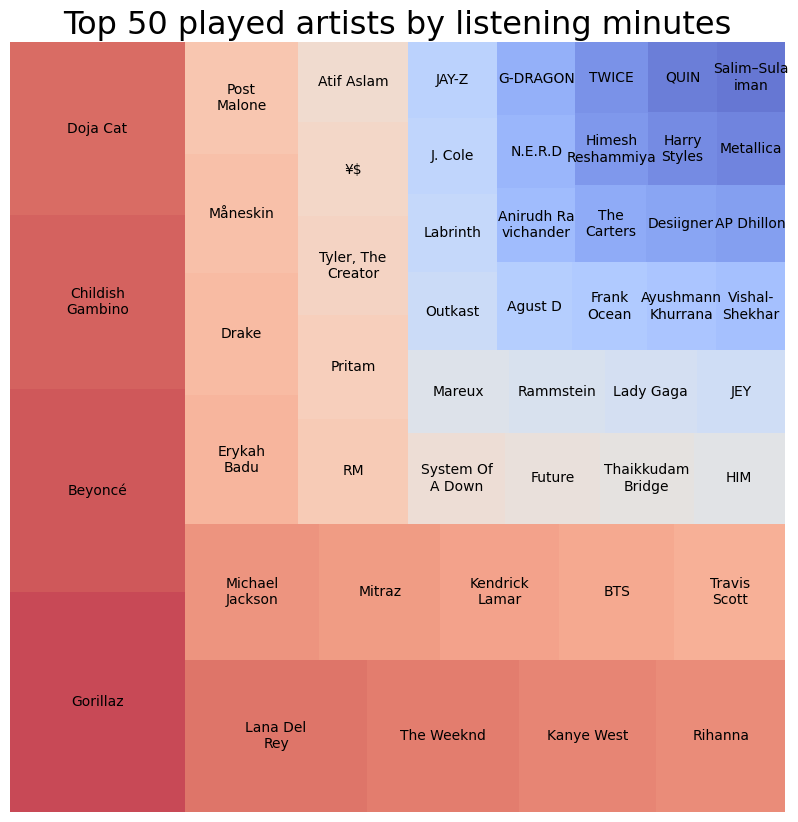

In [5]:
Plots.top_n_artists_by_playtime(df, 50)

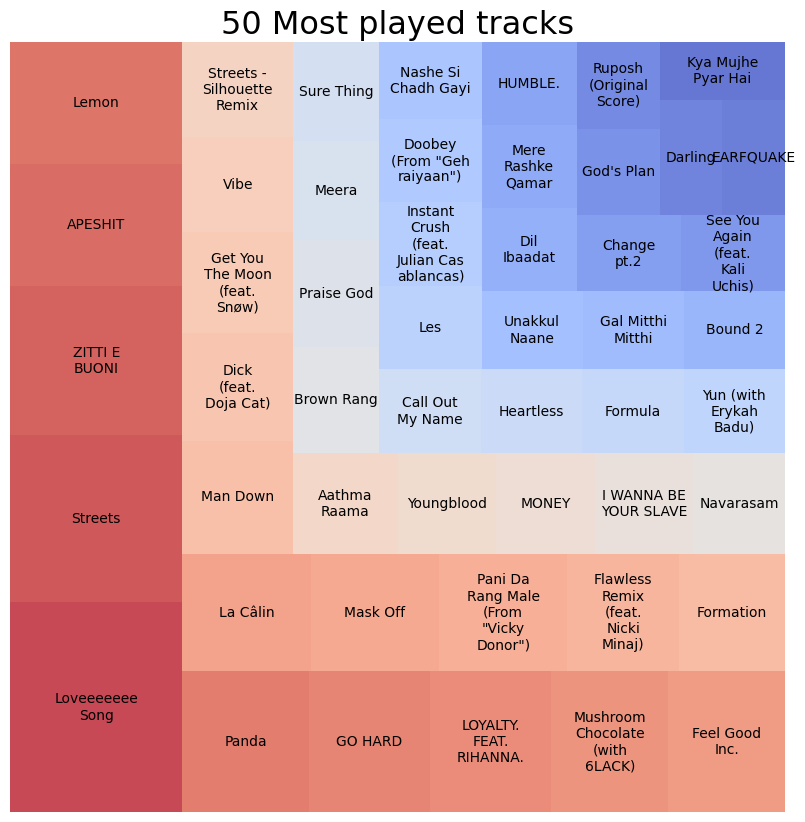

In [6]:
Plots.top_n_tracks_by_playcount(df, 50)

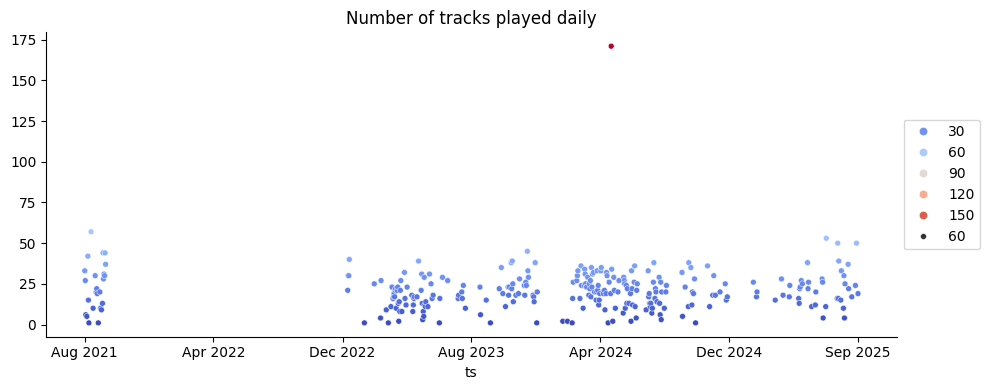

In [7]:
# Scatter plot
Plots.daily_tracks_graph(df)

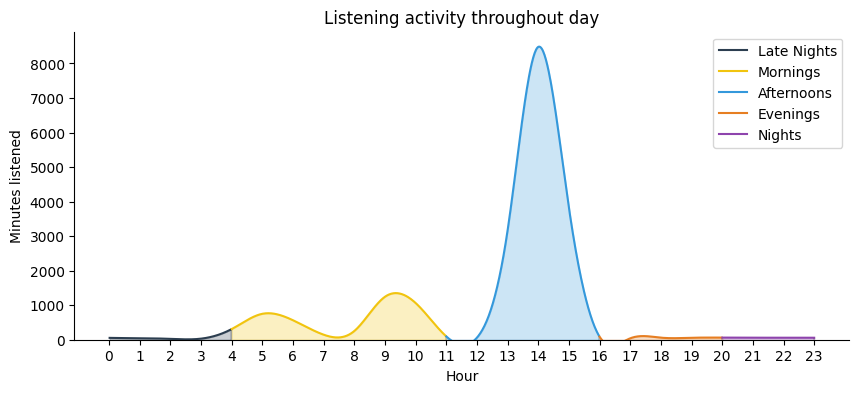

In [8]:
# Line plot
Plots.daily_listening_activity(df)

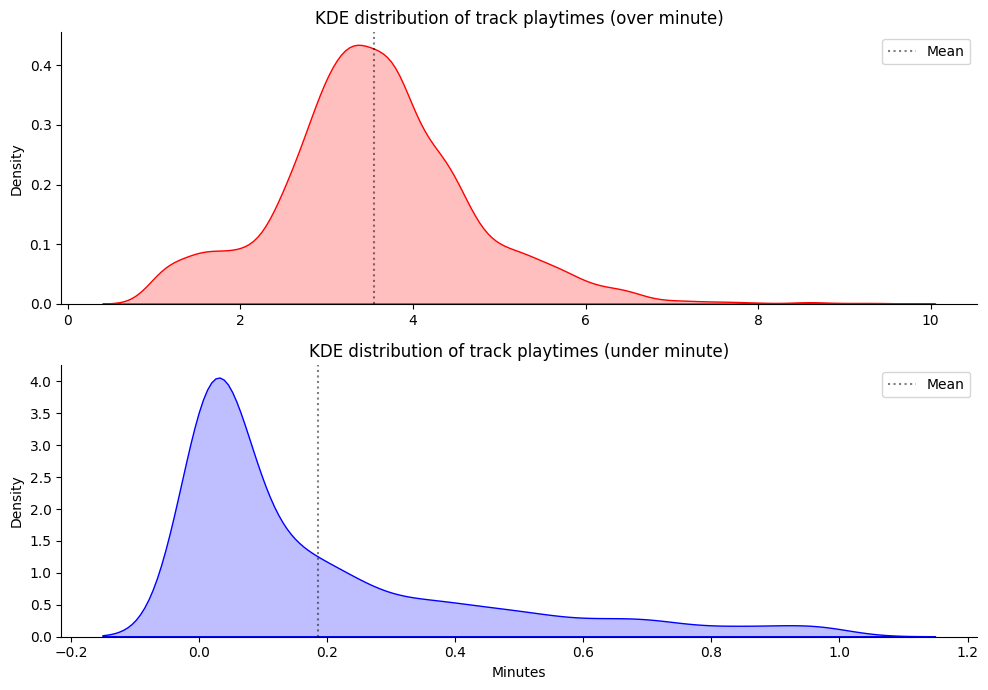

In [9]:
# Line plot
Plots.track_playtime_kde_dist(df)

/home/divij/coding/projects/spotify-data-analysis/utils/plots.py:477: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/home/divij/coding/projects/spotify-data-analysis/utils/plots.py:477: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


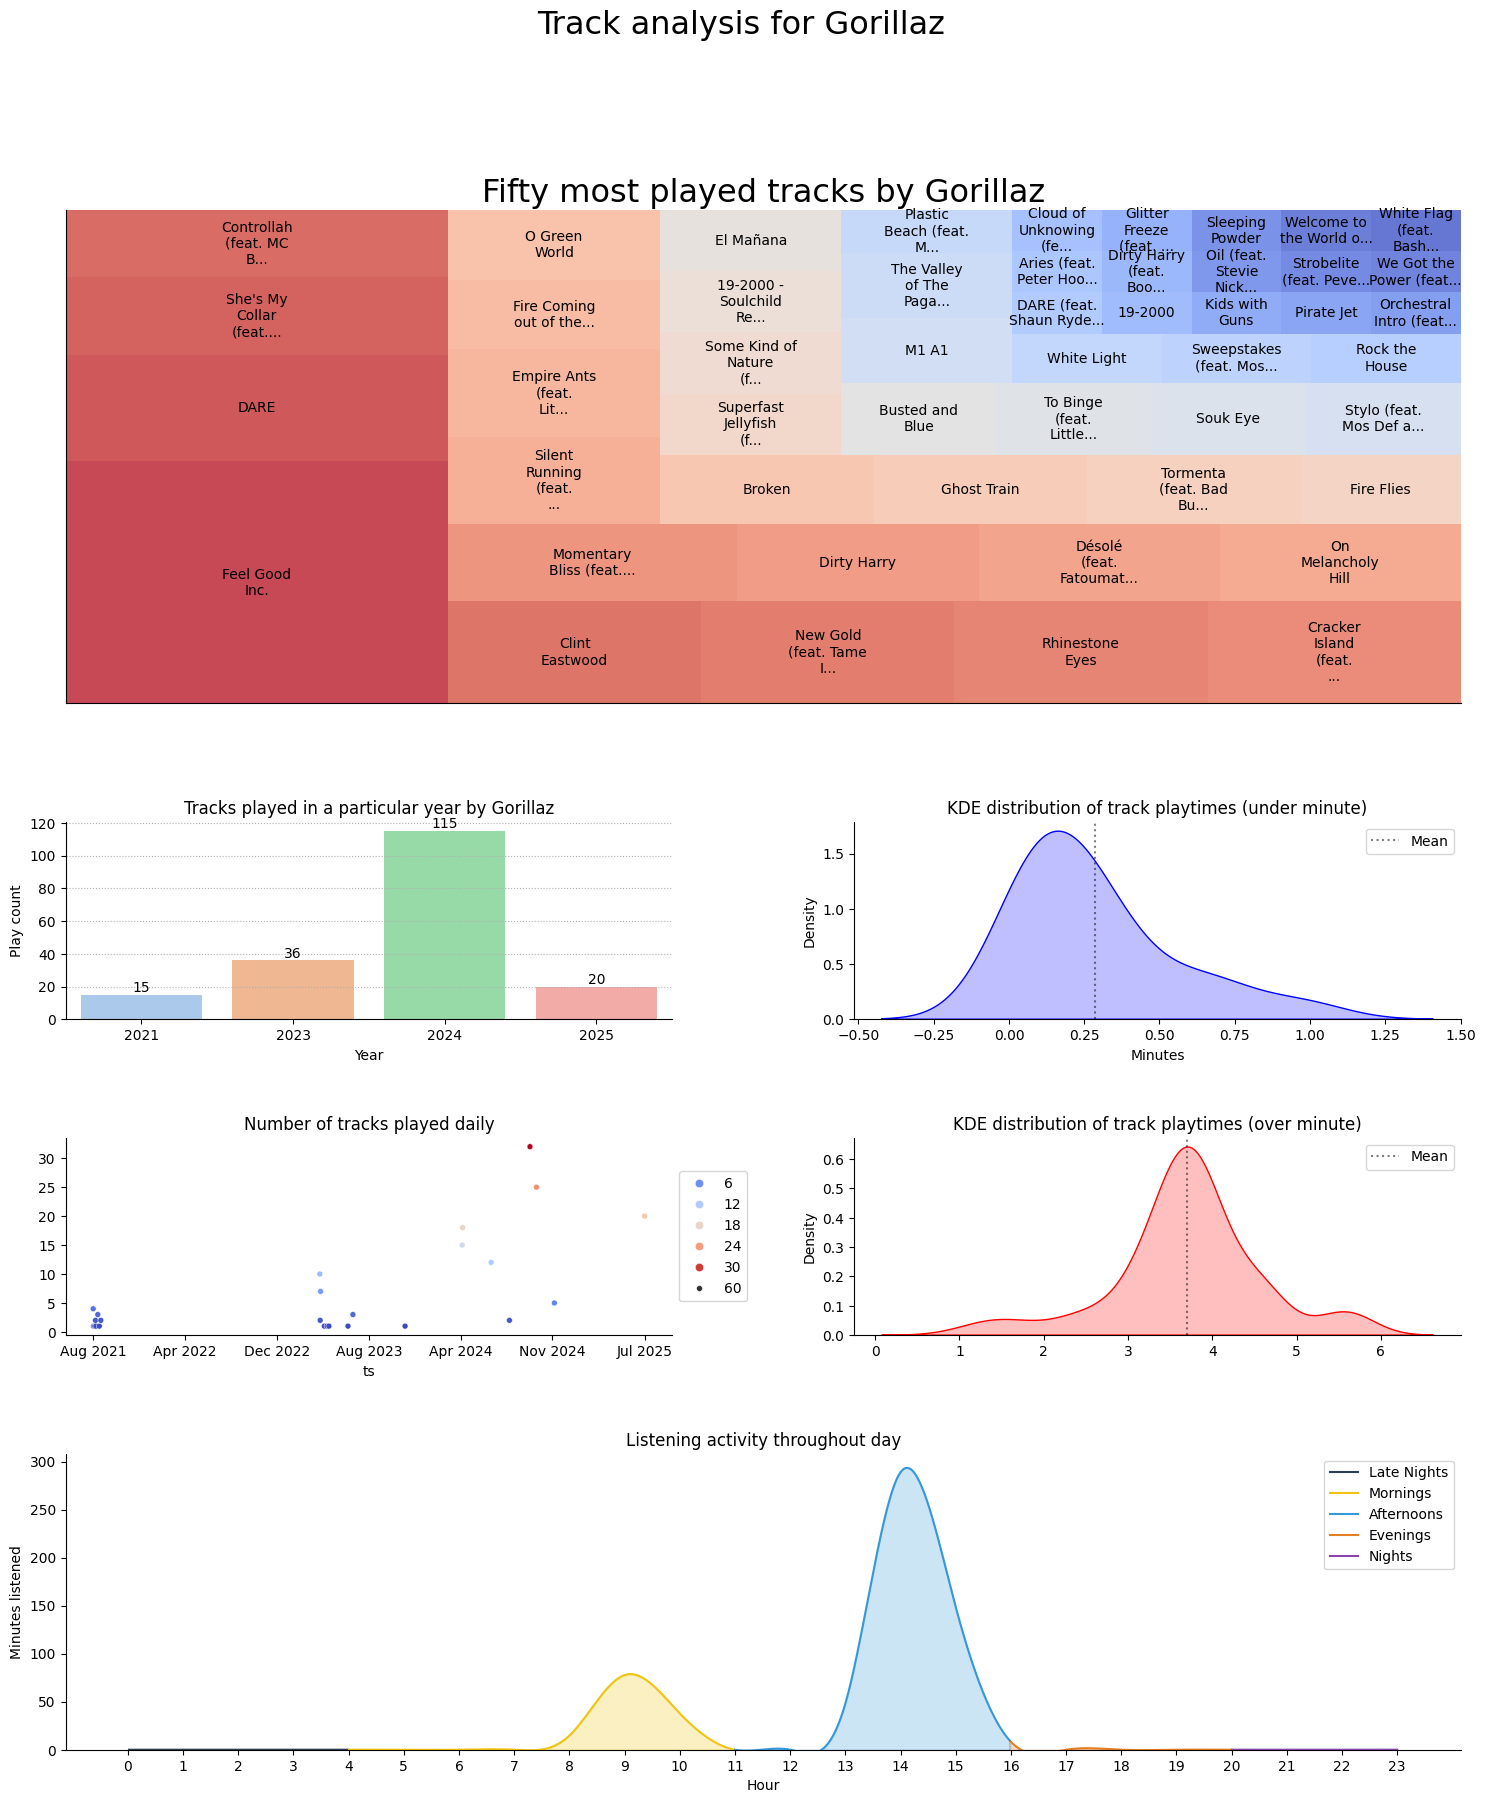

/home/divij/coding/projects/spotify-data-analysis/utils/plots.py:477: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/home/divij/coding/projects/spotify-data-analysis/utils/plots.py:477: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


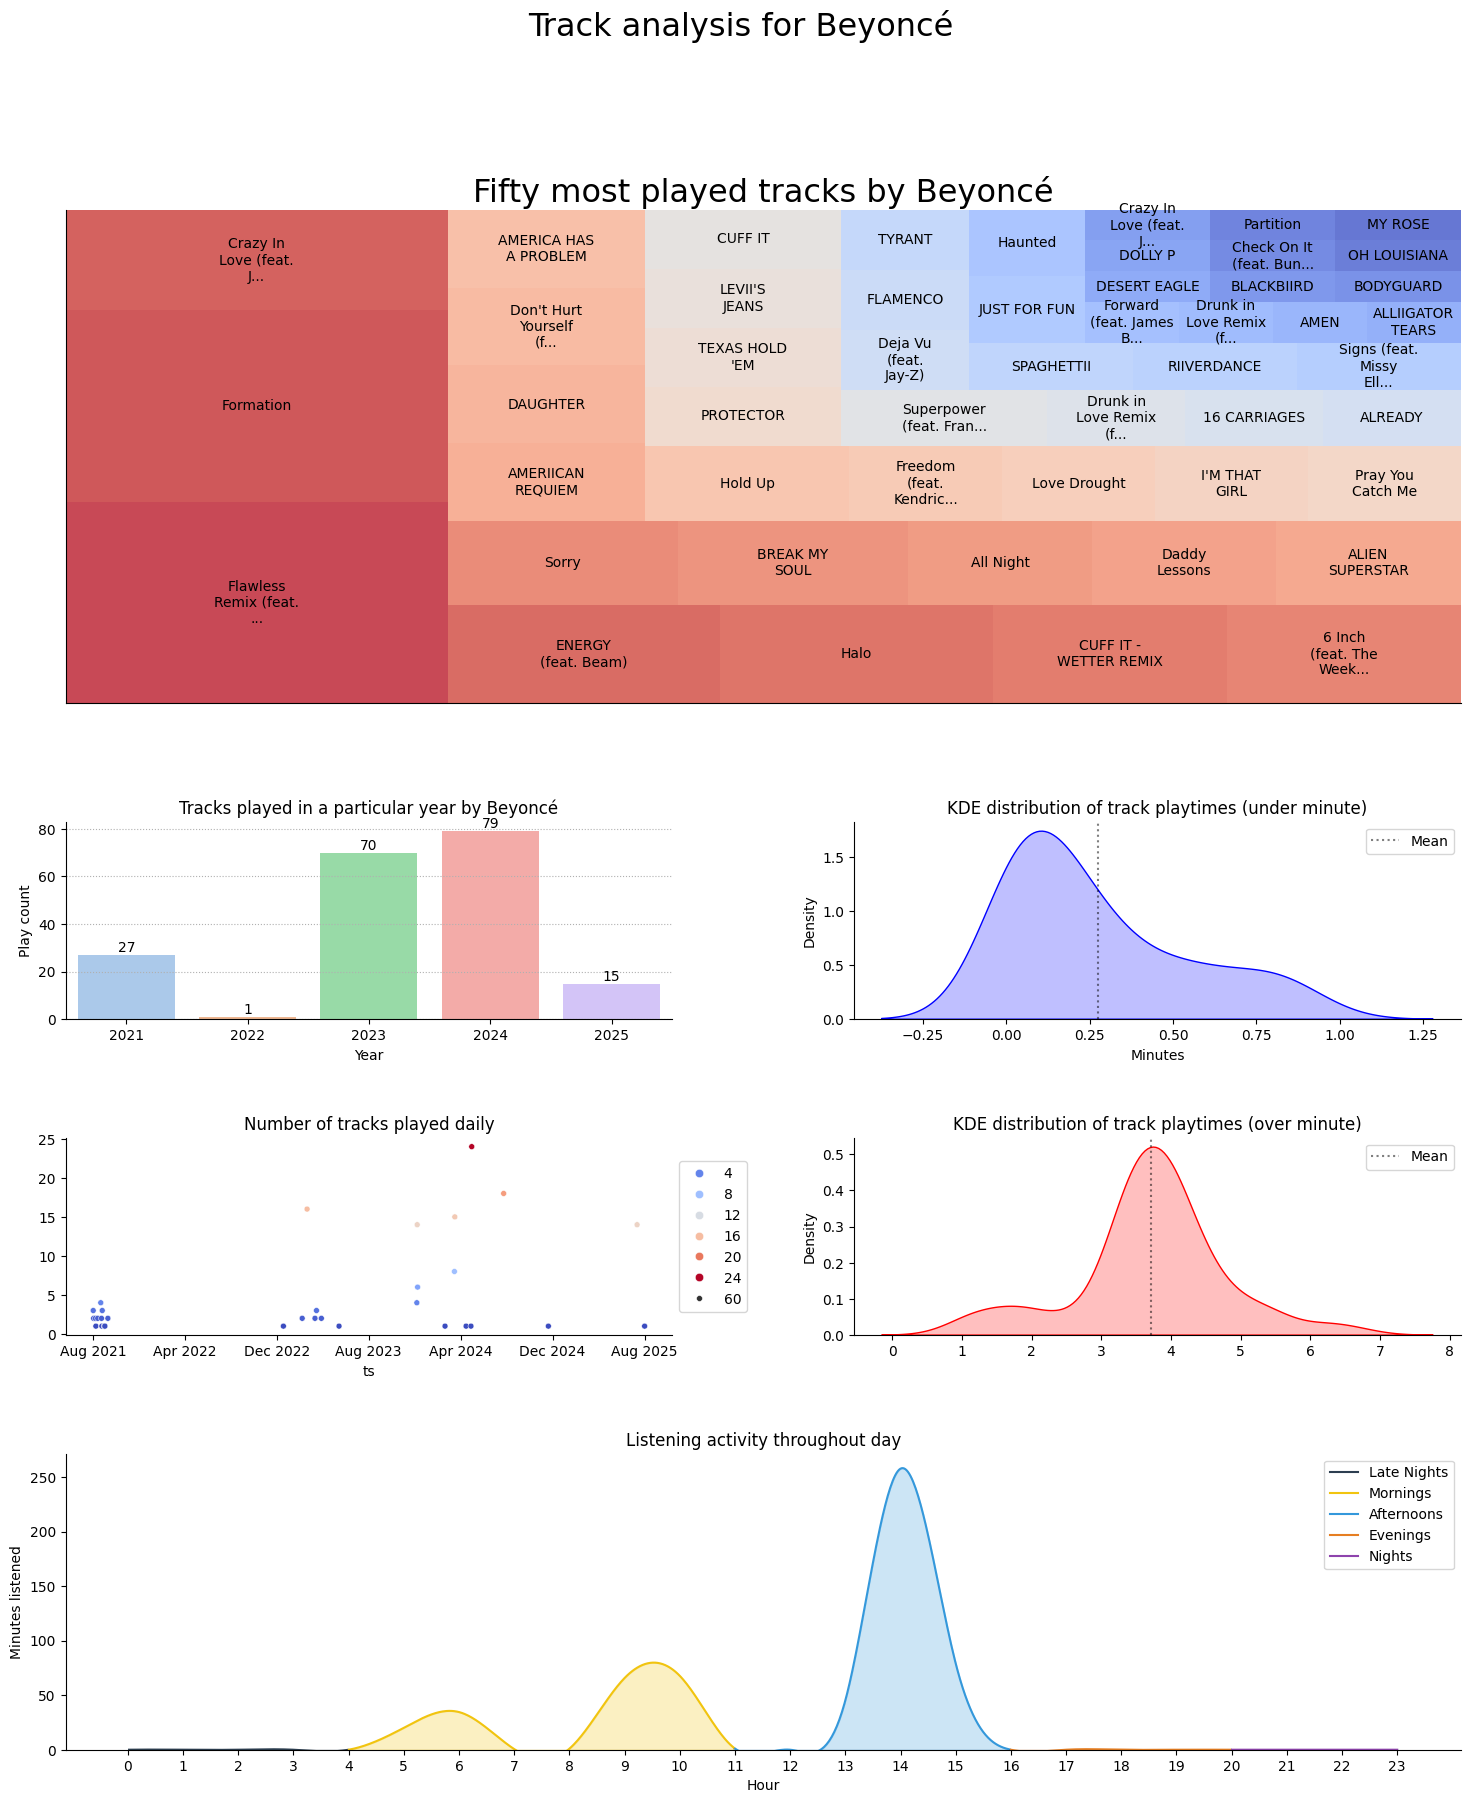

/home/divij/coding/projects/spotify-data-analysis/utils/plots.py:477: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/home/divij/coding/projects/spotify-data-analysis/utils/plots.py:477: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


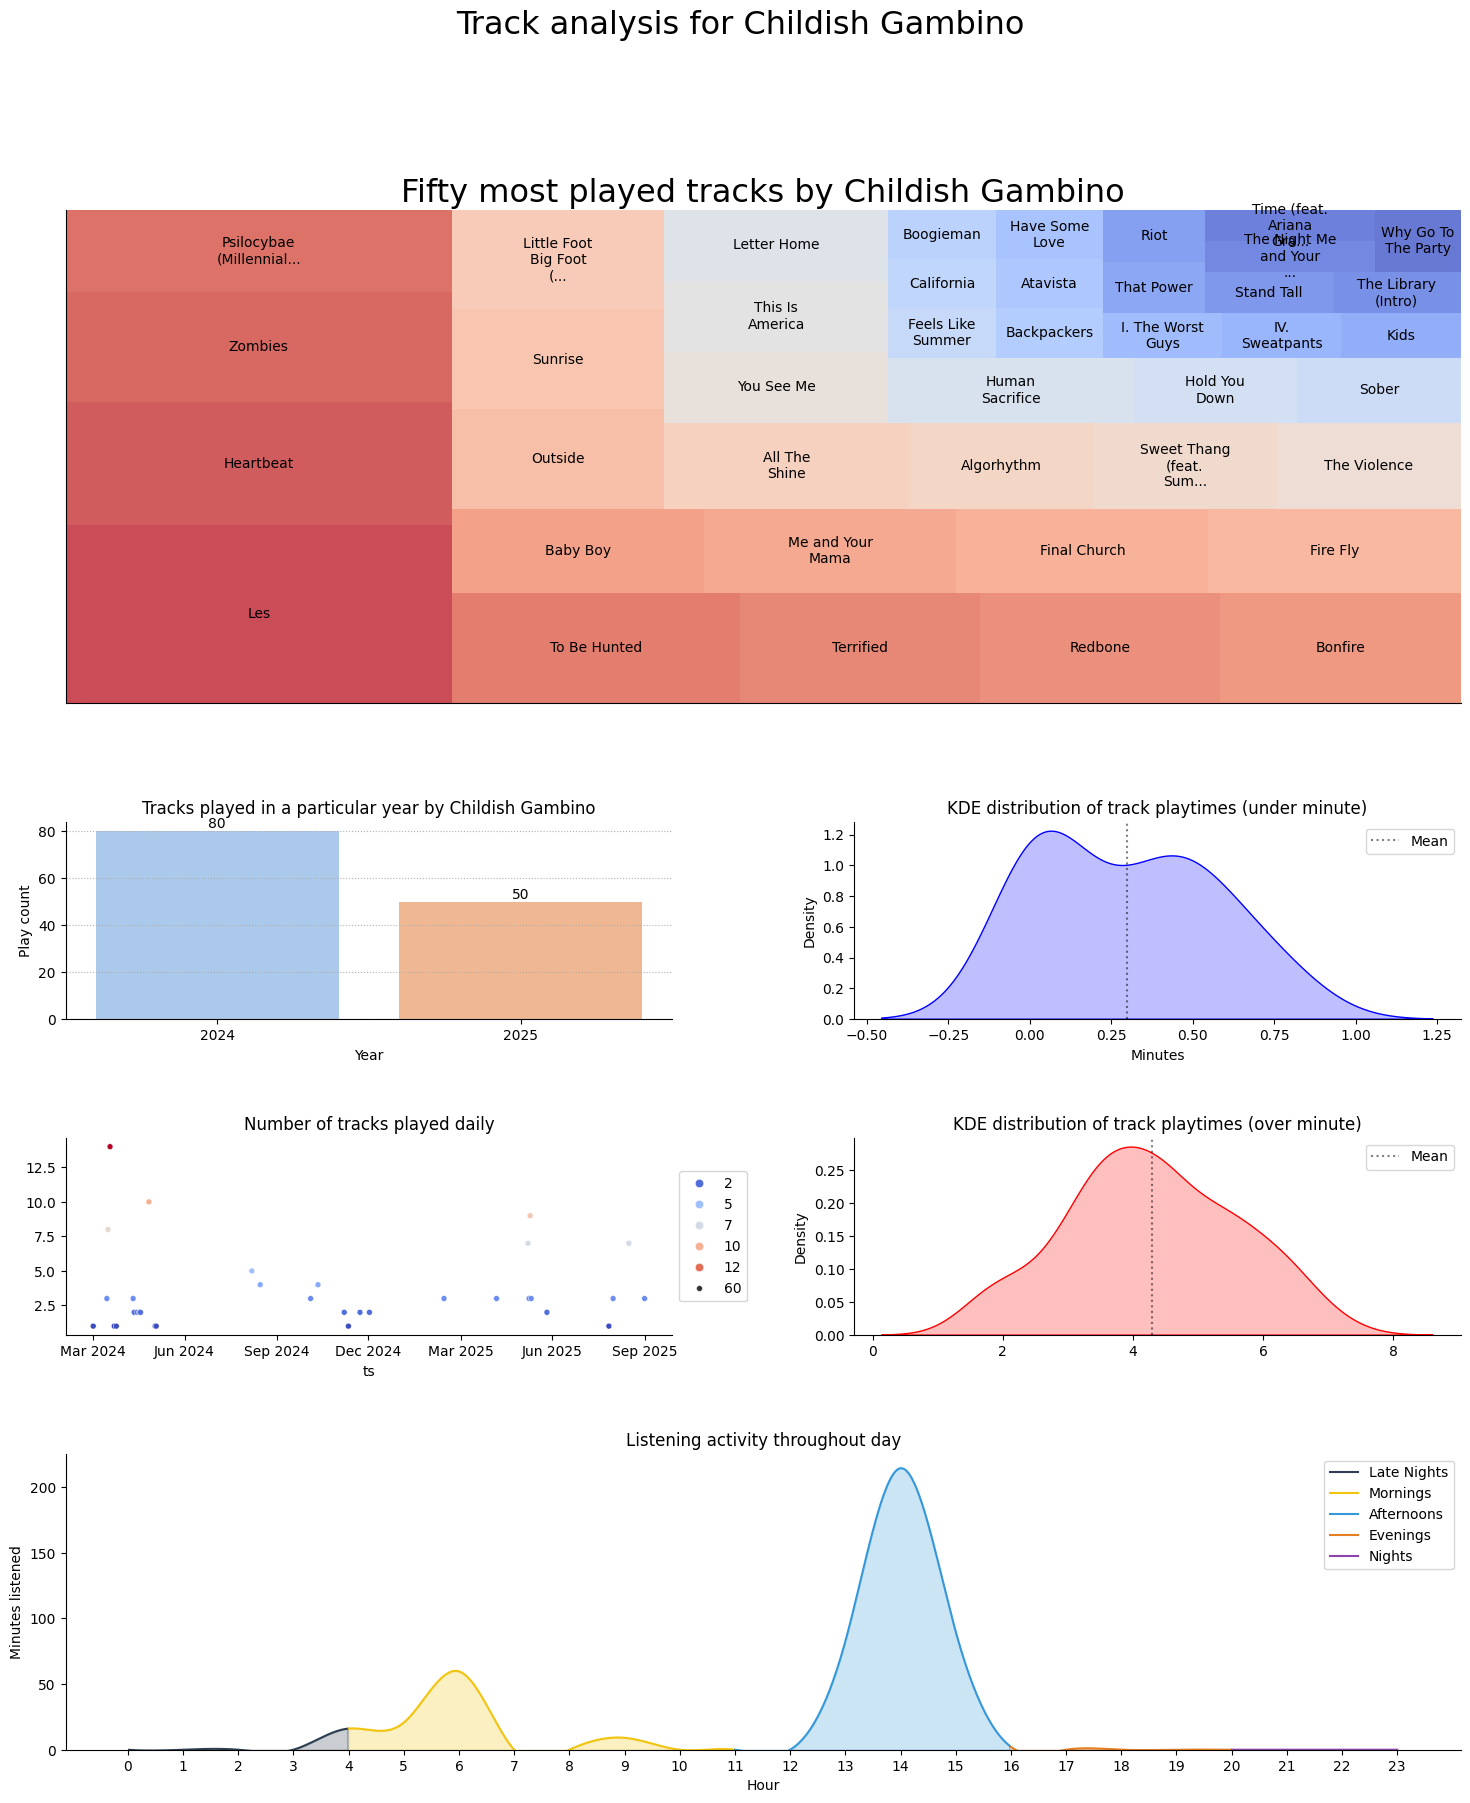

/home/divij/coding/projects/spotify-data-analysis/utils/plots.py:477: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/home/divij/coding/projects/spotify-data-analysis/utils/plots.py:477: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


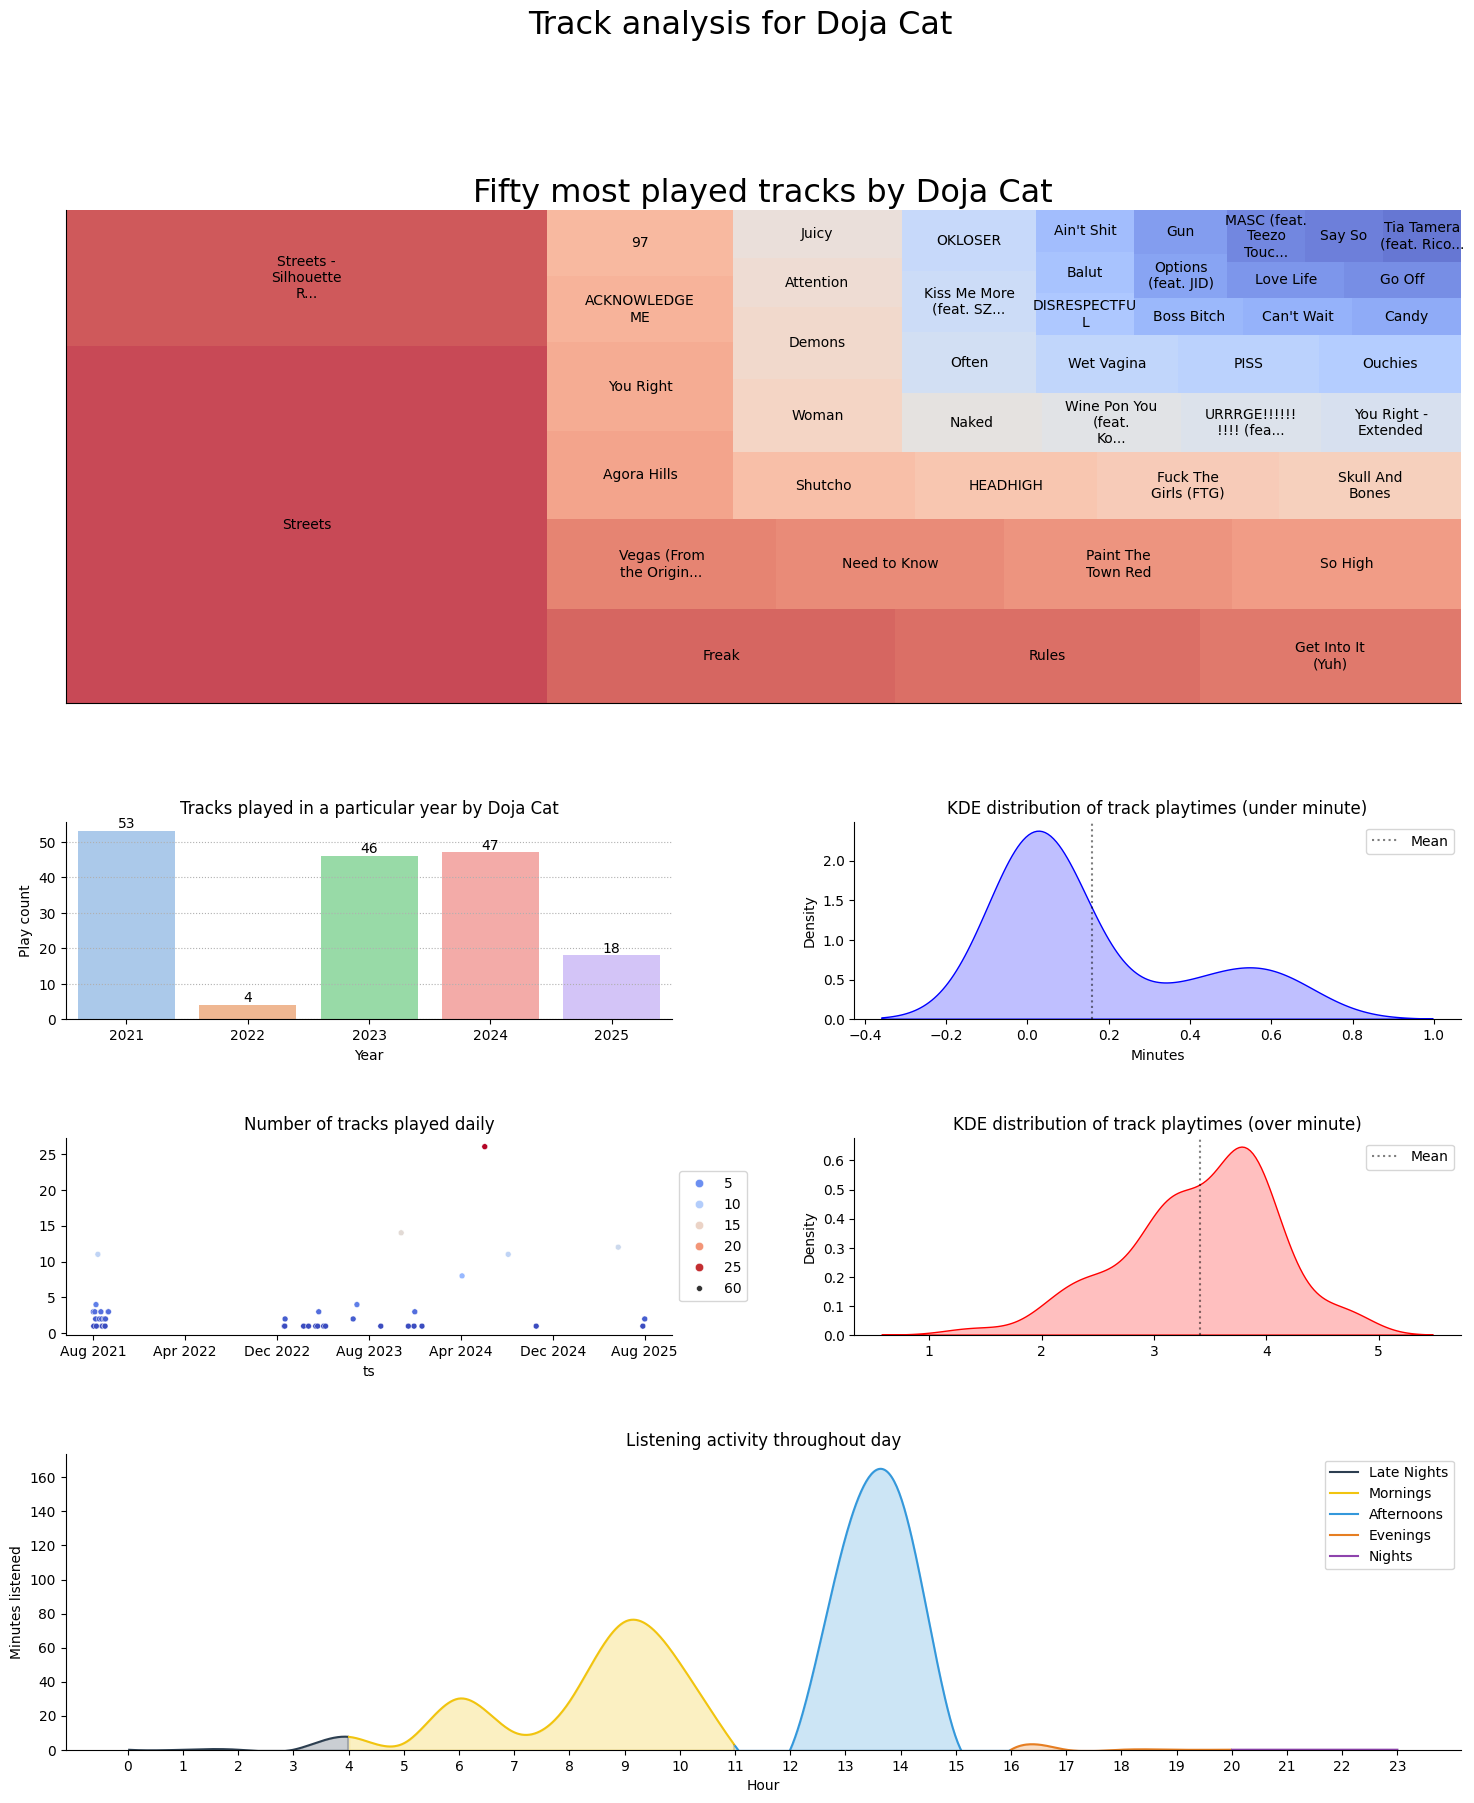

/home/divij/coding/projects/spotify-data-analysis/utils/plots.py:477: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/home/divij/coding/projects/spotify-data-analysis/utils/plots.py:477: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


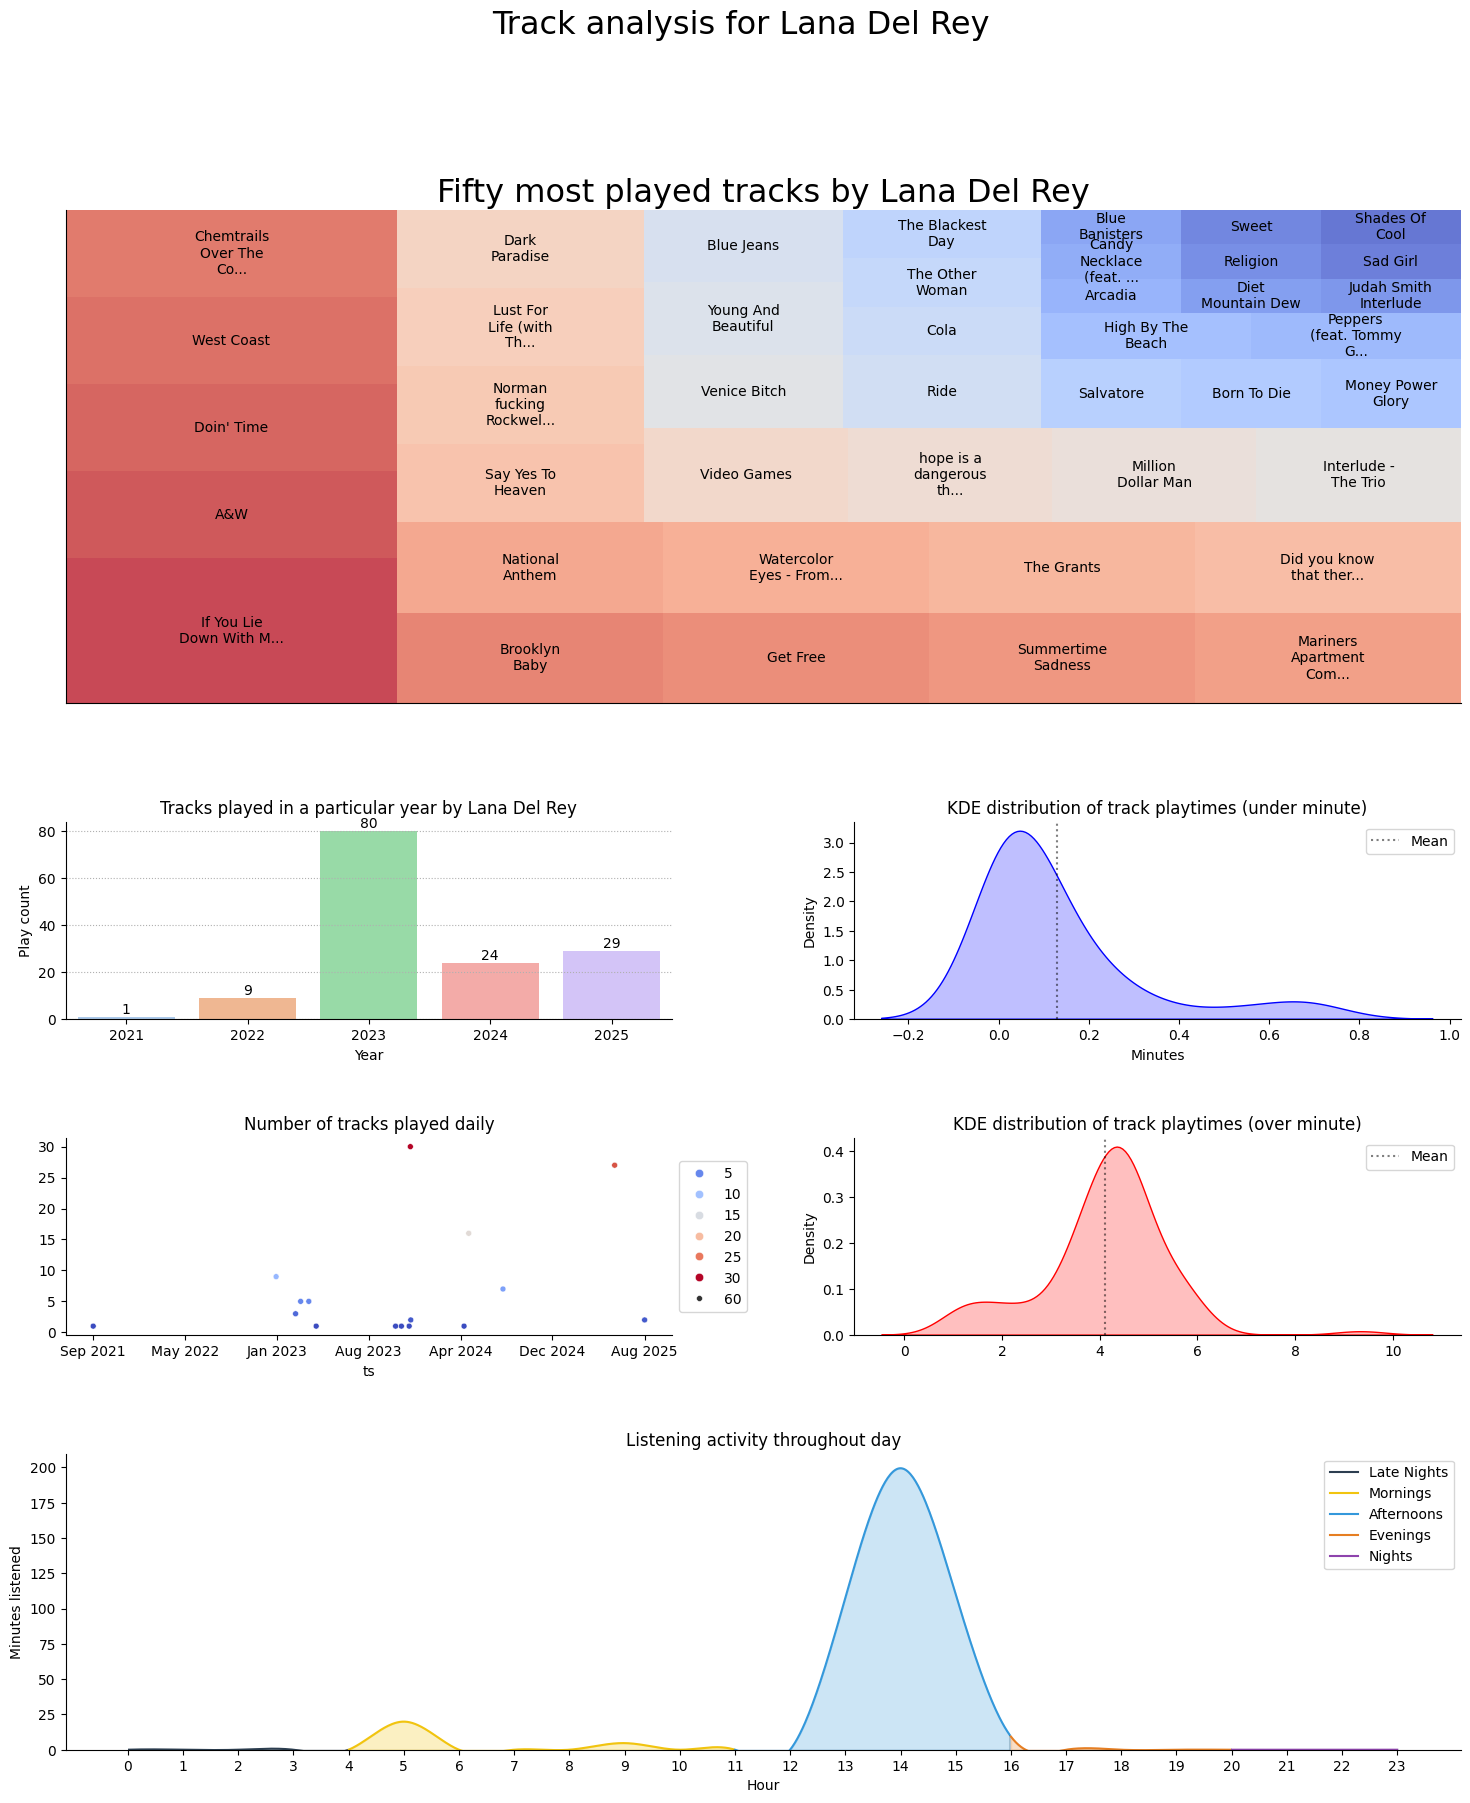

In [10]:
from typing import cast

n = 5
top_artists = (
    df.groupby("master_metadata_album_artist_name")["ms_played"]
    .sum()
    .sort_values(ascending=False)
)

top_artists.head()

for artist_name, _ in top_artists.head(n).items():
    artist_name = cast(str, artist_name)
    Plots.analysis_per_artist(df, artist_name)
    print(" ")